In [ ]:
import cv2
from ultralytics import YOLO
import os
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry import box as shapely_box
import matplotlib.pyplot as plt
import easyocr

reader = easyocr.Reader(['ch_sim','en'])
# model = YOLO('models/Odometer_OCR_yolov8_runs/train/weights/best.pt')
accepted_odo_labels = ["odometer"]

In [ ]:
import re

# accepted_odo_labels = ['car', 'vehicle', 'auto']  # Example labels

def checkLargest(result):
    largest_box = None
    car_seg_cords = None
    box_index = 0
    max_area = 0
    bboxes = []
    if len(result) > 0:
        for i in range(len(result.boxes)):
            box = result.boxes[i]
            label = result.names[box.cls[0].item()]
            xyxy = box.xyxy[0].tolist()  # Extract coordinates from the list
            x1, y1, x2, y2 = xyxy
            bboxes.append([x1, y1, x2, y2, label])
            if not label.lower() in accepted_odo_labels:
                continue
            area = (x2 - x1) * (y2 - y1)  # Calculate area

            if area > max_area:
                max_area = area
                largest_box = (x1, y1, x2, y2)
                box_index = i
    return largest_box, box_index, bboxes


odo_pos = ['ODO', 'OUO', 'OOO', 'OCO', 'UDO']
replacements = {"k": "", "m": "", "l": "", "i": "", "a": "", "u": "", "I": "1", "T": "1", "S": "5", "O": "0", " ": ""}

def get_kms(ocr):
    for i in range(len(ocr)):
        string = ocr[i].upper()
        for odo_str in odo_pos:
            if odo_str in string:
                if odo_str == string:
                    if i + 1 < len(ocr):
                        return correct_kms_str(ocr[i + 1])
                    else:
                        return correct_kms_str(ocr[i - 1])
                else:
                    return correct_kms_str(ocr[i].replace(odo_str, ""))
    
    # If no odo position found, use extract_numbers logic
    kms_str = extract_numbers(ocr)
    return correct_kms_str(kms_str)


def extract_numbers(strings):
    distanceTravelled = ""
    numbers = []
    for string in strings:
        match = re.search(r'\d+', string)  # Find the first occurrence of a number in the string
        if match:
            numbers.append(match.group(0))  # Append the matched number to the numbers list
        
        for i in numbers:
            if 4 <= len(i) <= 6:
                distanceTravelled = i
                
    return distanceTravelled


def correct_kms_str(kms_str):
    if kms_str is not None:
        for k, v in replacements.items():
            kms_str = kms_str.replace(k, v)
    return kms_str


# Example usage
ocr_results = ['ODO12345', 'Some text', 'Another string 67890']
kms = get_kms(ocr_results)
print("Extracted KMs:", kms)


In [ ]:
dir='odo 2'
print(os.listdir(dir))

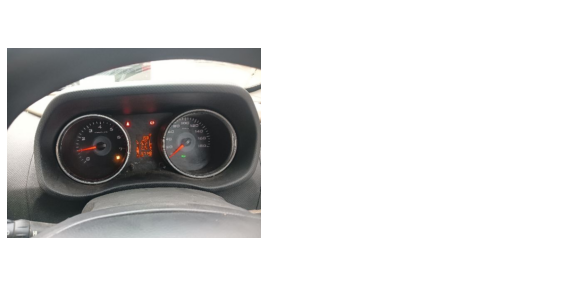

['130', '']
 ---  kms
odo 2\drop_car_odometer-01562BFD.jpg


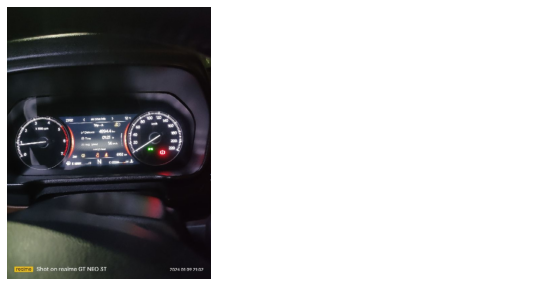

["@' Copes", '49446', 'OTlo', 'Ou', '70', '1 W', '2', 'G2w', 'TegITe', 'Shot on realme GTNEO 3T', '70740109 21.07']
49446 --- 49446 kms
odo 2\drop_car_odometer-01A47159.jpg


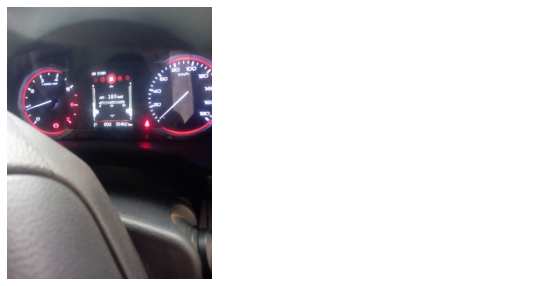

['7', '205 ', 'Dq', '3 ']
 ---  kms
odo 2\drop_car_odometer-01C30CF7.jpg


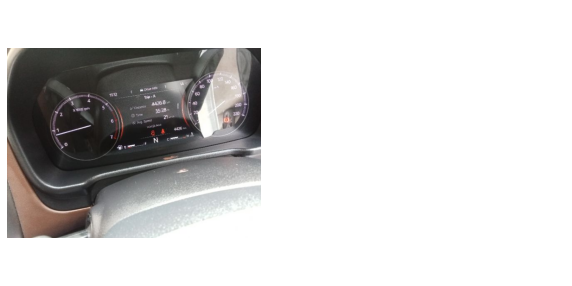

['TROT', '4426', 'OeIo', '44268', 'Igue', '35;28', 'CS', 'y']
44268 --- 44268 kms
odo 2\drop_car_odometer-020C65C8.jpg


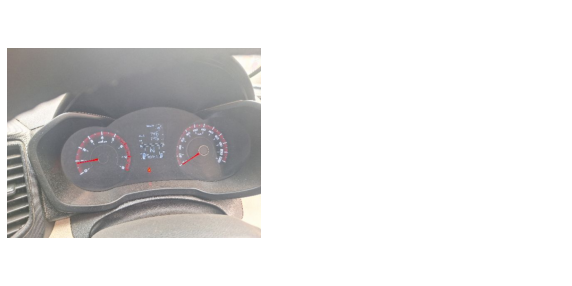

[]
 ---  kms
odo 2\drop_car_odometer-0290945A.jpg


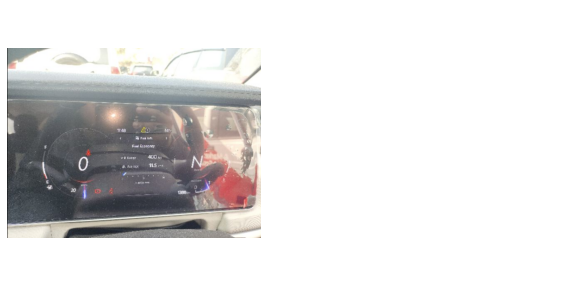

[' FaeIs', 'FualLononTy', 'ho', '400N', '42', '15 1']
 ---  kms
odo 2\drop_car_odometer-035B1A4D.jpg


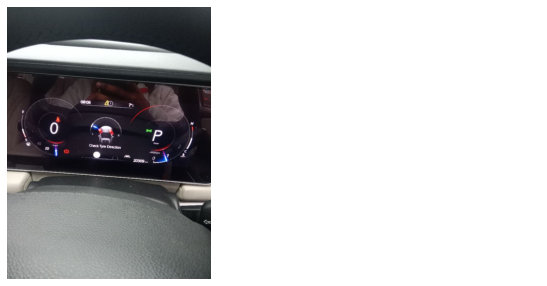

['C0', 'P', 'Check Twe Directon', '20309']
20309 --- 20309 kms
odo 2\drop_car_odometer-037FA96B.jpg


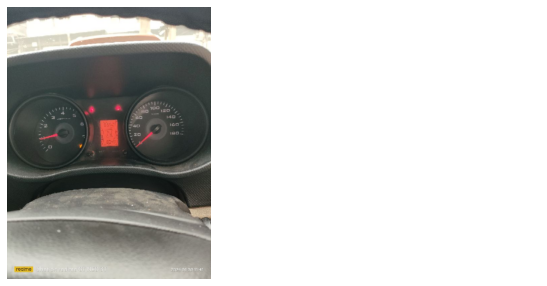

['50', '140', '40', '160', '20', '180', 'TegITe', "」'儿」」 `=", '32401DN11:41', '150']
32401 --- 32401 kms
odo 2\drop_car_odometer-03D74C2F.jpg


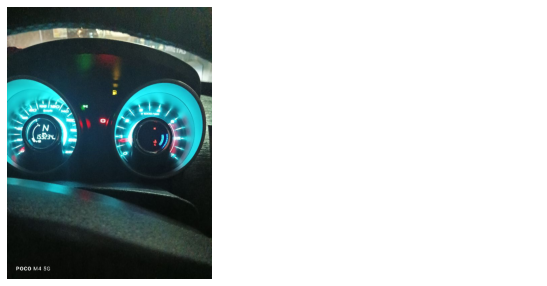

['N', 'I5孔', 'POCO M4 56']
PM456 --- PM456 kms
odo 2\drop_car_odometer-0477C62A.jpg


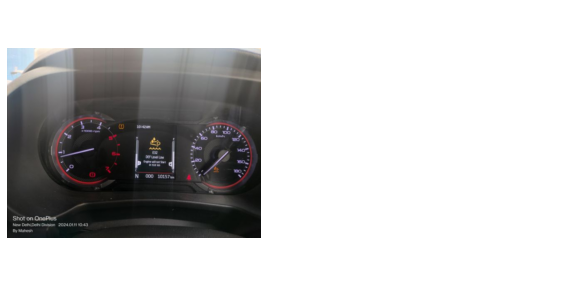

['IOIAN', 'ut', 'U0', 'OFUeLaw', 'ulnr5', '150', 'OOO', '10157m', 'Shot on OnePlus', 'ChDplh Dilon  202401111043', "By 'ahush"]
10157 --- 10157 kms
odo 2\drop_car_odometer-05276C90.jpg


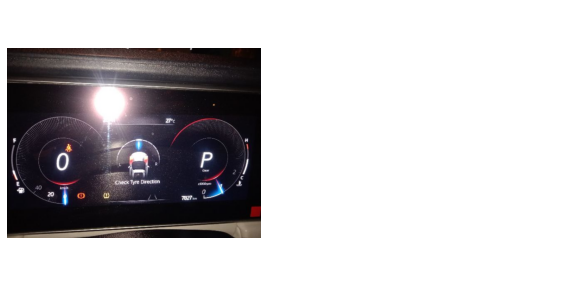

['P', 'CheckTyre Dcclon', 'SUTTI', '7827']
7827 --- 7827 kms
odo 2\drop_car_odometer-05B940A7.jpg


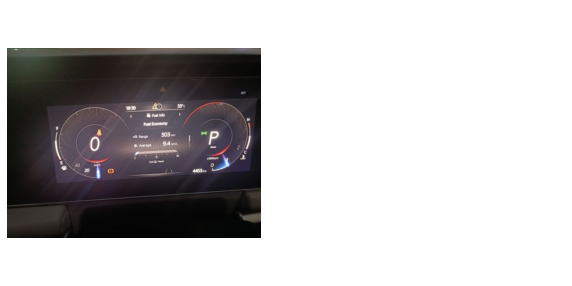

['F  o', 'FalECoII', 'F', '503', '94', 'P', '4493']
4493 --- 4493 kms
odo 2\drop_car_odometer-062D276F.jpg


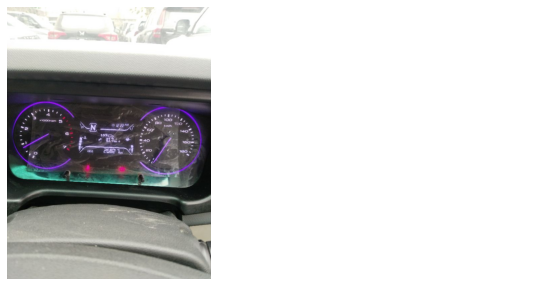

['DCCJ', '100', 'SC', 'e22AM', 'C', 'GO', '1410', ' Tun', 'TEOa', '282', '780']
1410 --- 1410 kms
odo 2\drop_car_odometer-07A9F962.jpg


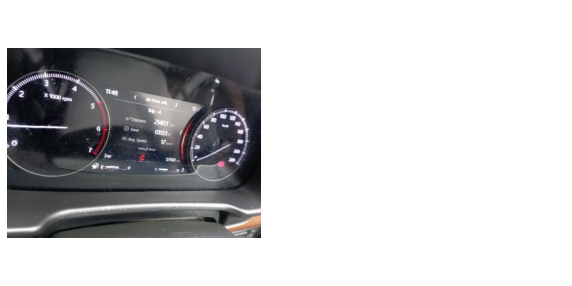

['I0r', 'Dao', 'Oin3:', 'T*', 'OO', '2IO', '9me']
 ---  kms
odo 2\drop_car_odometer-084A9C41.jpg


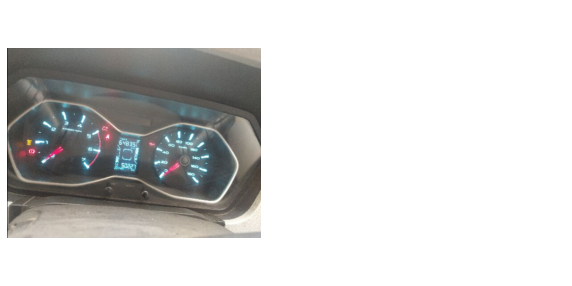

['6旧35', 'om', '9327']
9327 --- 9327 kms
odo 2\drop_car_odometer-088473B8.jpg


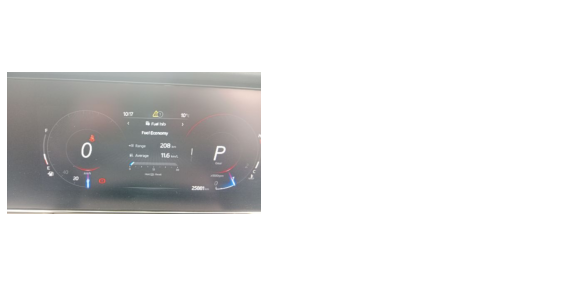

['107', '隅 FuaIo', 'Ful Eom', 'Rts', '208', '116u', 'P', '2SOOTo']
 ---  kms
odo 2\drop_car_odometer-089260BB.jpg


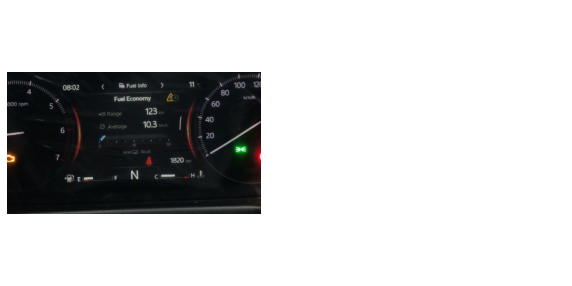

['08:02', 'FuelInlo', '100', '12[', '80', 'Fuel Economy', 'Nm', '000Tom', '60', 'Ranle', '123', '40', '0v2rag=', '103', '20', 'TrouRe', '1820']
1820 --- 1820 kms
odo 2\drop_car_odometer-08F9C2A8.jpg


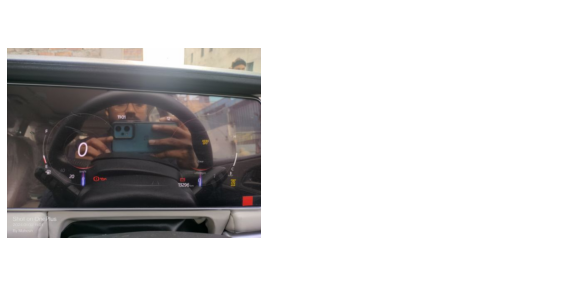

['O', '73296', 'uol', 'lu', ' | +|']
73296 --- 73296 kms
odo 2\drop_car_odometer-08FF9109.jpg


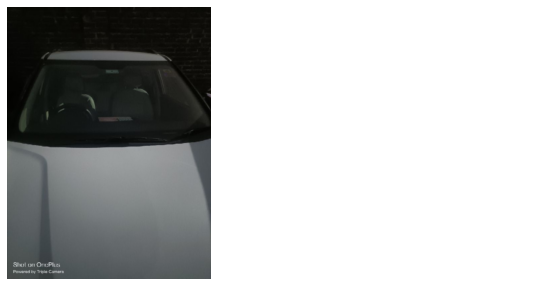

['Shol on OncPlus', 'Powered by Triple Camera']
 ---  kms
odo 2\drop_car_odometer-09B516A8.jpg


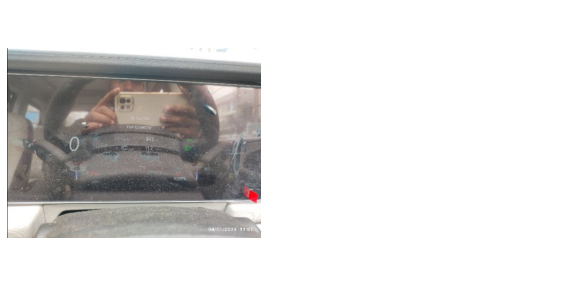

['FuelEcom', '00112024', '11:01']
 ---  kms
odo 2\drop_car_odometer-09B52E83.jpg


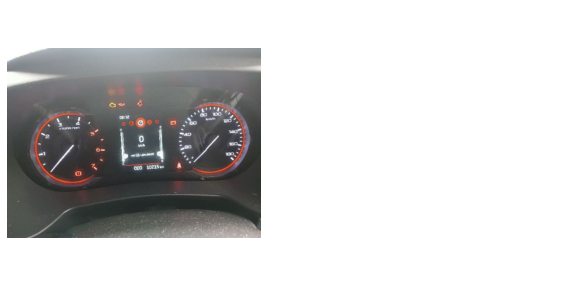

['00', '009;3', 'tt', '20', 'C', 'eaone[', '10', '60', '[La', '180', 'OD', '10215#']
10215 --- 10215 kms
odo 2\drop_car_odometer-09CD46BA.jpg


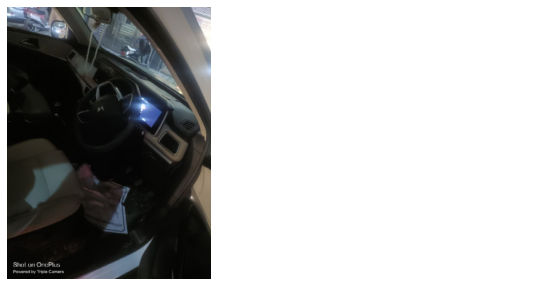

['Shol on OncPlus', 'Powered by Triple Camera']
 ---  kms
odo 2\drop_car_odometer-0A3DE149.jpg


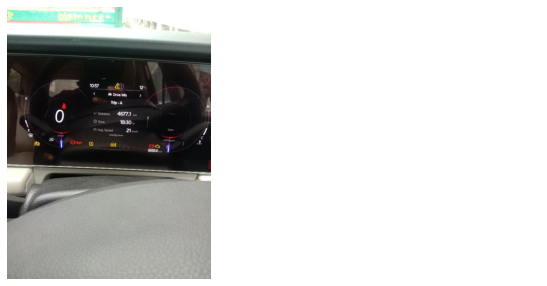

['C_', '1057', 'Orte No', 'Trp', 'Otance', '46771', '0 Tme', '18:30', 'A Sperd', '21m', 'Taue', 'R', 'Cl', 'CC', '8094']
8094 --- 8094 kms
odo 2\drop_car_odometer-0A413232.jpg


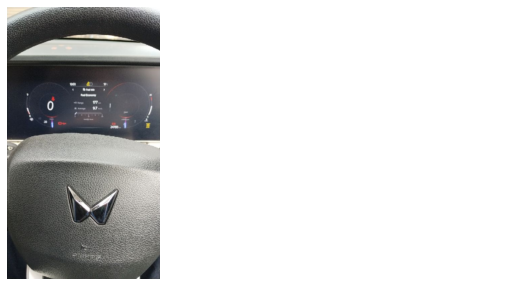

[]
 ---  kms
odo 2\drop_car_odometer-0A463000.jpg


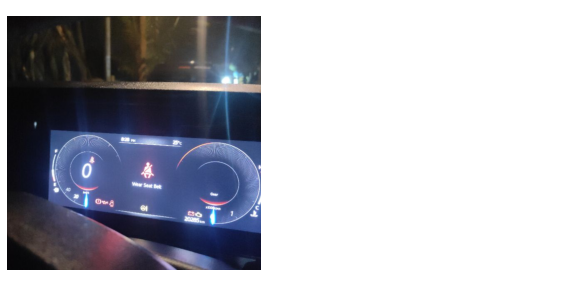

['Sot Bk', 'Ol', '0e', 'C', 'Pser']
 ---  kms
odo 2\drop_car_odometer-0B8369A8.jpg


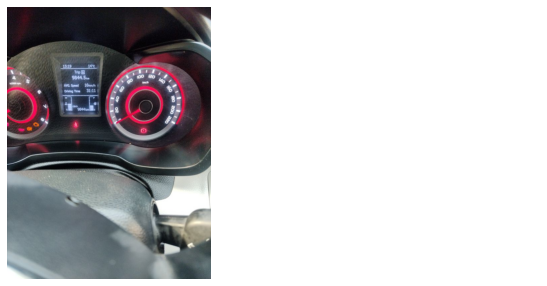

['1519', 'Trp 囚', '9844.5le', 'IOO', '1e0', 'Whh', 'G', 'N So', 'IOhmh', ' Drng Tre', '31:11', '@', 'i', '984Am', '6', '詈']
9844 --- 9844 kms
odo 2\drop_car_odometer-0BA0B3AE.jpg


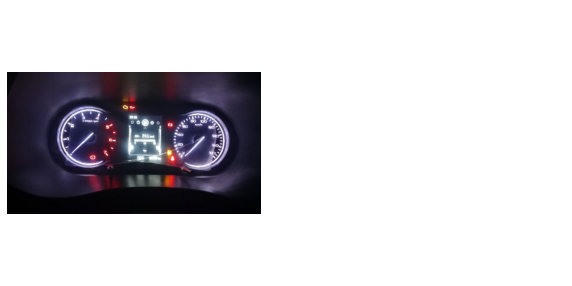

['']
 ---  kms
odo 2\drop_car_odometer-0C1604EE.jpg


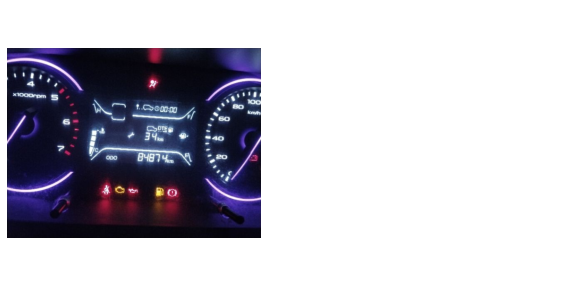

['XOOOO', '100', '#.C3000:O0', '80', '60', 'C30巧m', '「0', 'ODO', 'BH7 U', '2', '3ym']
X0 --- X0 kms
odo 2\drop_car_odometer-0C19A63F.jpg


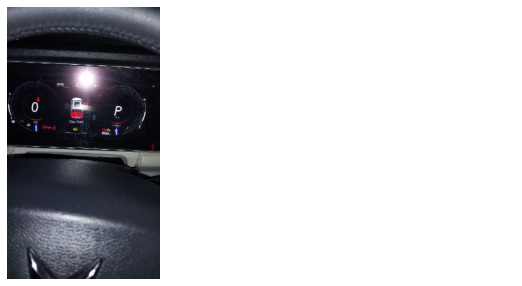

['P', 'T8g']
 ---  kms
odo 2\drop_car_odometer-0C618885.jpg


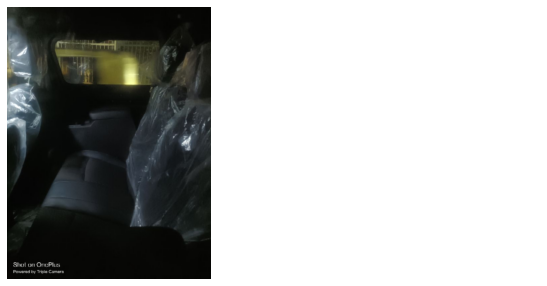

['Shol on OncPlus', 'Powered by Triple Camera']
 ---  kms
odo 2\drop_car_odometer-0D2DD82A.jpg


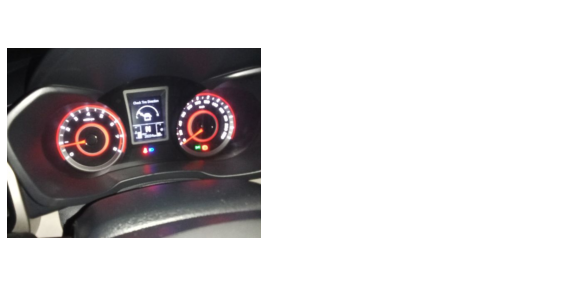

[]
 ---  kms
odo 2\drop_car_odometer-0DAEB5A6.jpg


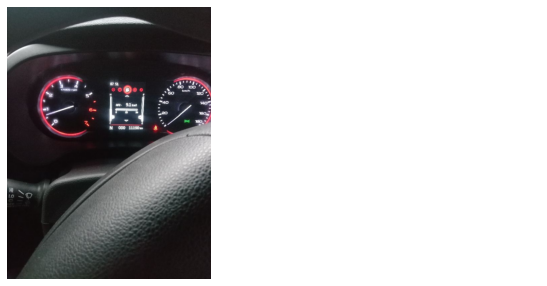

['8', '70', '', 'Cg', 'L0', '40', 'TO', '92w', '160', 'ONI', '111e0M', '10', '一0']
 ---  kms
odo 2\drop_car_odometer-0DB50240.jpg


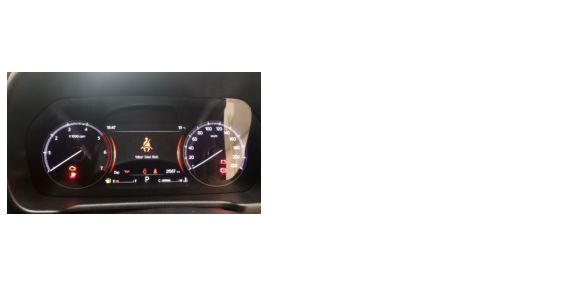

['3557']
3557 --- 3557 kms
odo 2\drop_car_odometer-0DDCD8DD.jpg


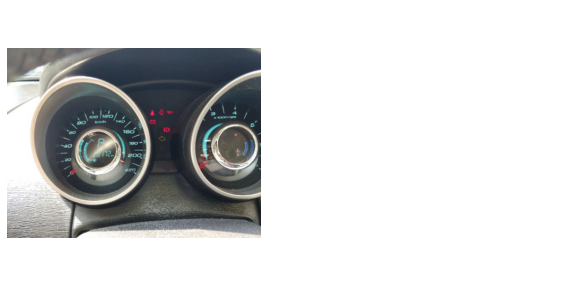

['TOO', 'TU0N', '曰0', '16', '166', '180', 'SU0', "'", '200', '20', 'haol']
 ---  kms
odo 2\drop_car_odometer-0E3B4710.jpg


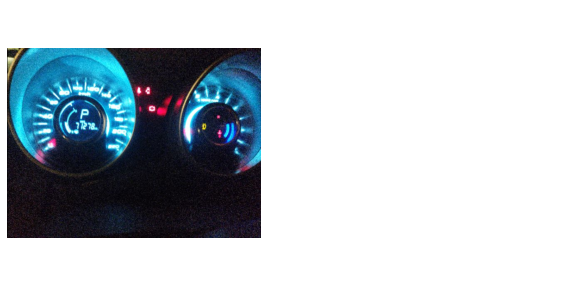

['尸', '(P']
 ---  kms
odo 2\drop_car_odometer-0E3C7A57.jpg


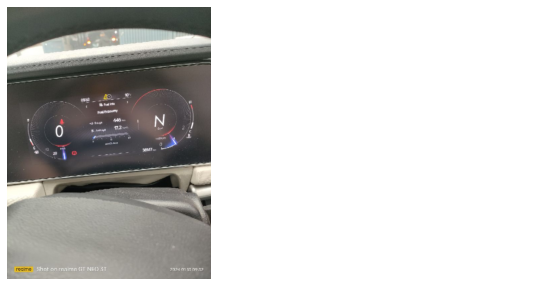

['Fuallrto', 'FualFtoNwiy', 'Ar', '446 ', 'N', '12en', 'N2', 'sAII', 'TBTITw', 'TegIIe', 'Shot on Iealme GTNEO 3', '00240115025', '0952']
0952 --- 0952 kms
odo 2\drop_car_odometer-0E8C0F7F.jpg


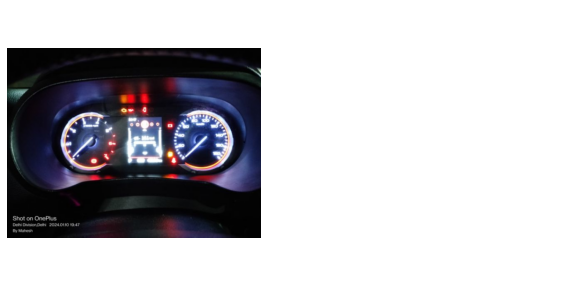

['Shot on OnePlus', 'Dahl O  lso Oa-lh', '20240110 19+7', "By 'ahnsh"]
 ---  kms
odo 2\drop_car_odometer-0FEAAB55.jpg


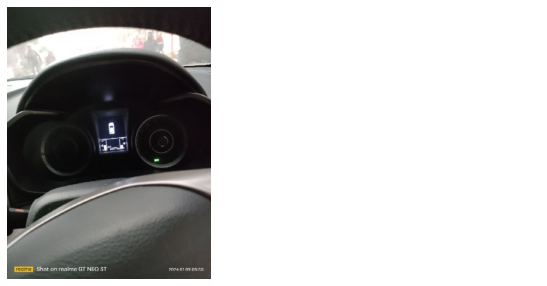

['WTaT', 'TegIIe', 'Shot onrealme GTNEO 3T', '7024010900.50']
 ---  kms
odo 2\drop_car_odometer-100B6F2A.jpg


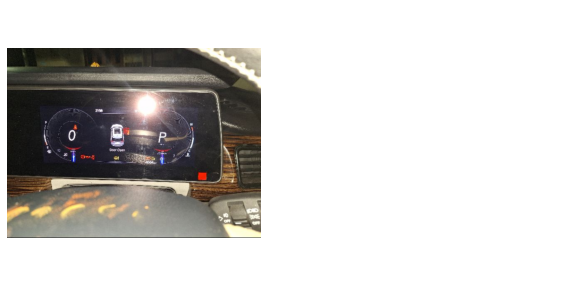

['Un?']
 ---  kms
odo 2\drop_car_odometer-10136EDC.jpg


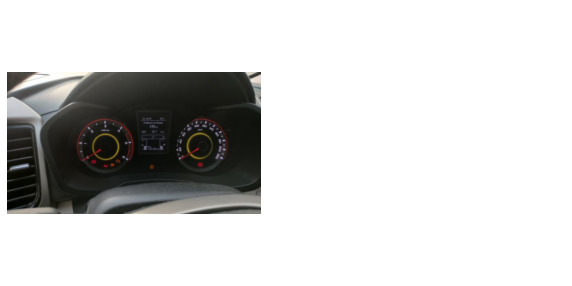

[]
 ---  kms
odo 2\drop_car_odometer-102DA882.jpg


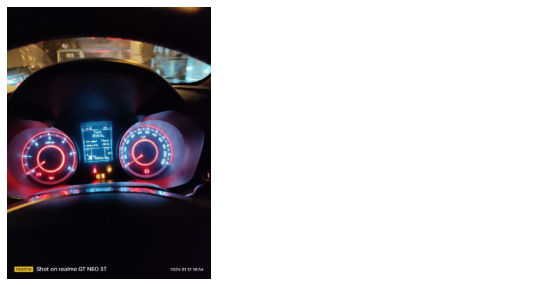

['4m', 'T', '3533', '+', 'Cha ro', 'M', 'TegIIe', 'Shot on realme GTNEO 3T', '707401121054']
3533 --- 3533 kms
odo 2\drop_car_odometer-1087F8EB.jpg


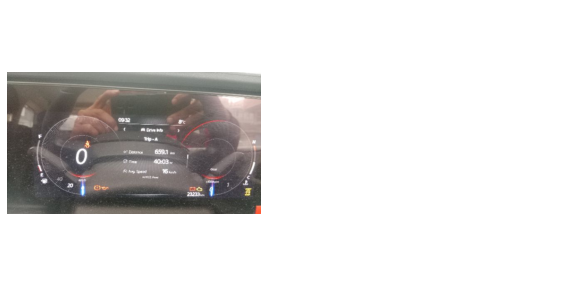

['02', 'Otal', 'T', 'ohl', '6591', '4003', 'ASR', 'N[3Ro', 'OM', 'No']
4003 --- 4003 kms
odo 2\drop_car_odometer-1117DE71.jpg


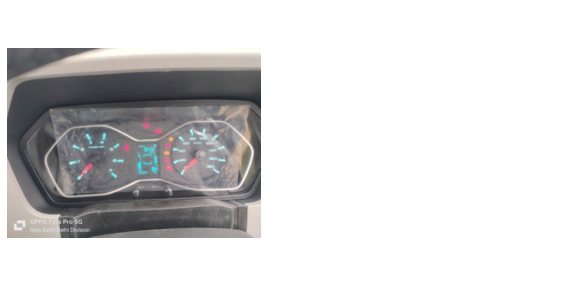

['~词', 'OPCO', 'Pro 56', 'ocelhl Dlslon']
 ---  kms
odo 2\drop_car_odometer-112AA117.jpg


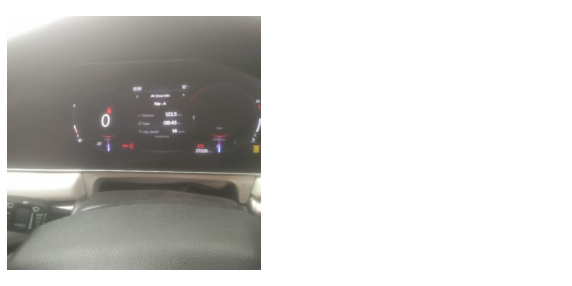

['35', '0']
 ---  kms
odo 2\drop_car_odometer-12BA28F8.jpg


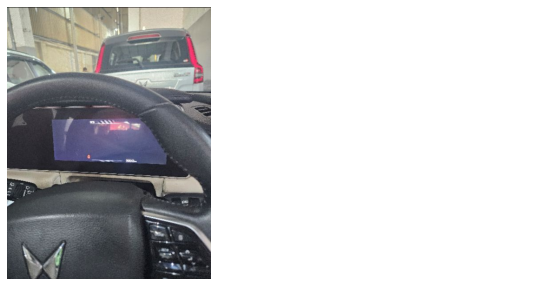

[]
 ---  kms
odo 2\drop_car_odometer-12D8EBD1.jpg


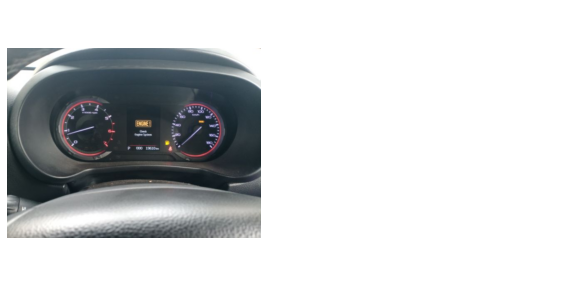

['AGH', 'u', '707']
 ---  kms
odo 2\drop_car_odometer-13E4EC7C.jpg


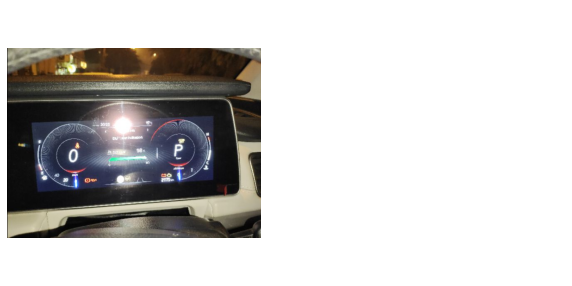

['@Uo', '3 !', 'P', 'C', 'OC']
 ---  kms
odo 2\drop_car_odometer-1499ABDE.jpg


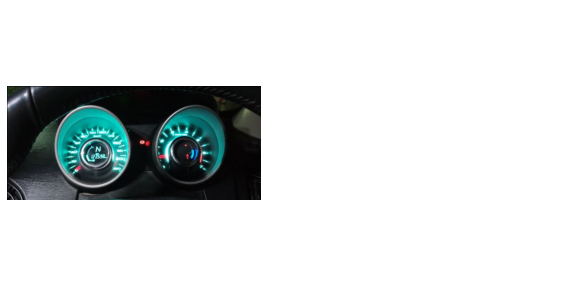

['7「']
 ---  kms
odo 2\drop_car_odometer-1548354B.jpg


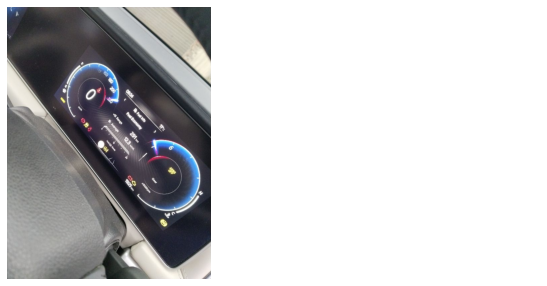

['', '訾', '{']
 ---  kms
odo 2\drop_car_odometer-155933A9.jpg


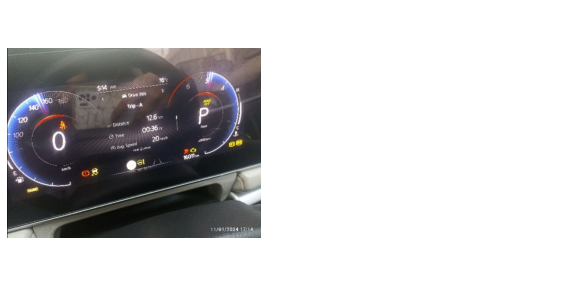

['SHp', 'NMe Mo', '450', '18', '10', 'TI', '120', '126', 'P', 'I00', '口Time', '2Ow ', 'G 49', '91', '7170112024171', 'U', 'C036rr', 'Scerd', 'Jootl']
 ---  kms
odo 2\drop_car_odometer-157A34D9.jpg


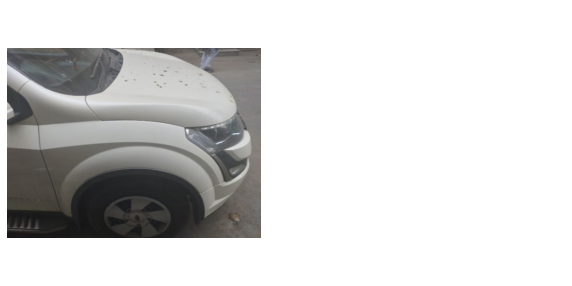

[]
 ---  kms
odo 2\drop_car_odometer-1581E8C8.jpg


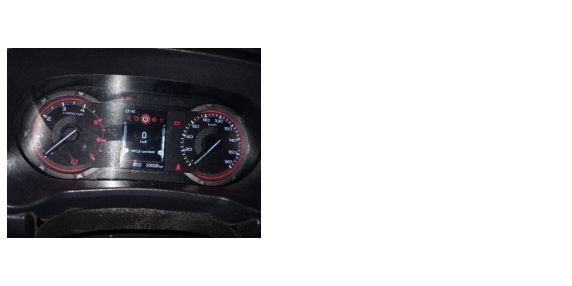

['Uf', 'IOU', '180', 'OOO', 'TUOGBI']
1U0GB1 --- 1U0GB1 kms
odo 2\drop_car_odometer-16315741.jpg


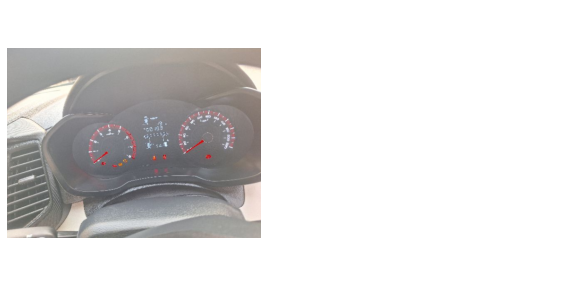

["'6", '[']
 ---  kms
odo 2\drop_car_odometer-1670F2DD.jpg


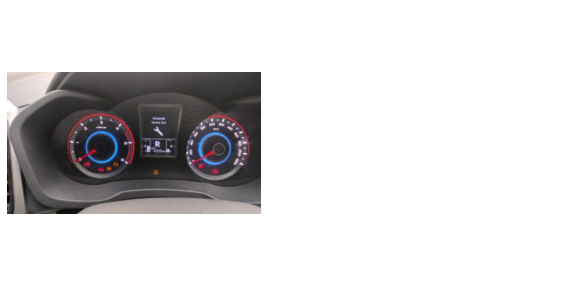

['ys[']
 ---  kms
odo 2\drop_car_odometer-168F47D3.jpg


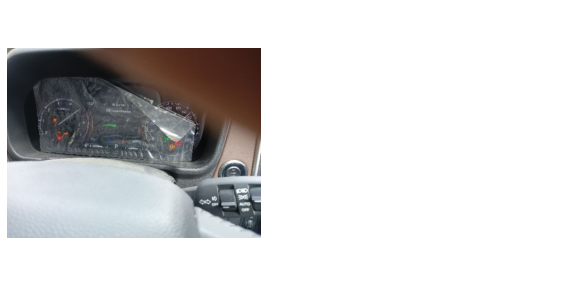

['6o', 'S', 'Go', 'So']
 ---  kms
odo 2\drop_car_odometer-169CA456.jpg


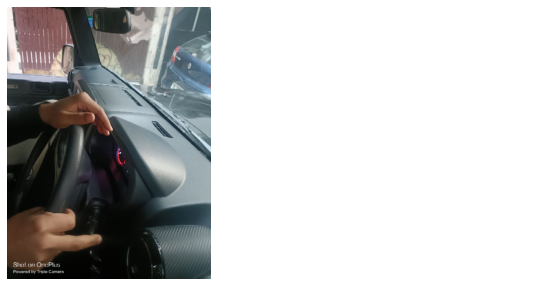

['Shol on OncPlus;', 'Powered by Triple Camera']
 ---  kms
odo 2\drop_car_odometer-16CE84A3.jpg


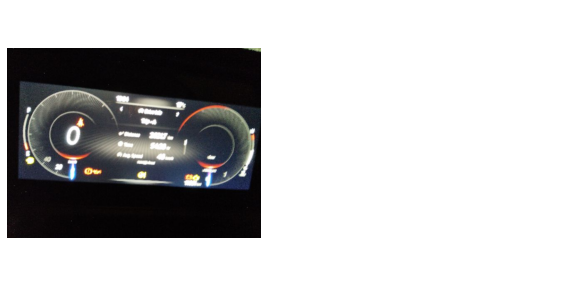

['9']
 ---  kms
odo 2\drop_car_odometer-16D7B5EA.jpg


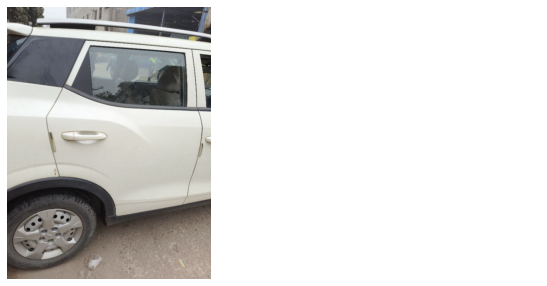

[]
 ---  kms
odo 2\drop_car_odometer-1752210C.jpg


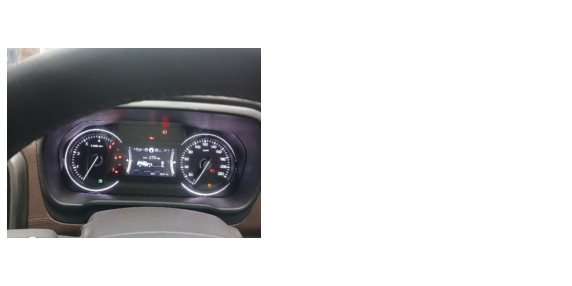

['U']
 ---  kms
odo 2\drop_car_odometer-179C2E77.jpg


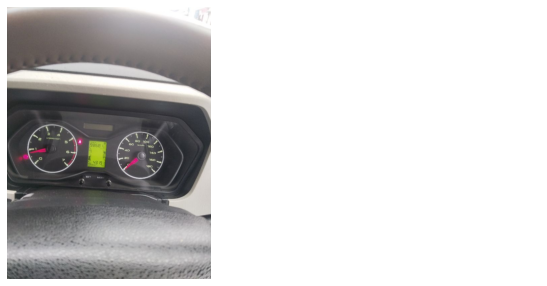

['988e', '18o', '14o', '160', '9319', '190', 'on']
9319 --- 9319 kms
odo 2\drop_car_odometer-1A13F632.jpg


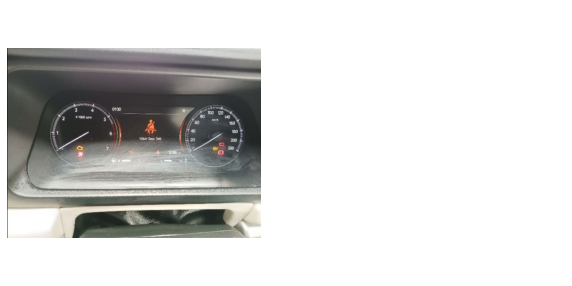

['U]']
 ---  kms
odo 2\drop_car_odometer-1B1E3AA4.jpg


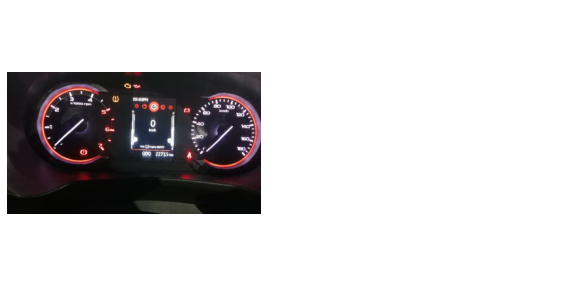

['060', '6', 'T', 'n', '0', '70', 'D0', 't CIaou', '3', 'C', '22715w']
22715 --- 22715 kms
odo 2\drop_car_odometer-1CDE0D95.jpg


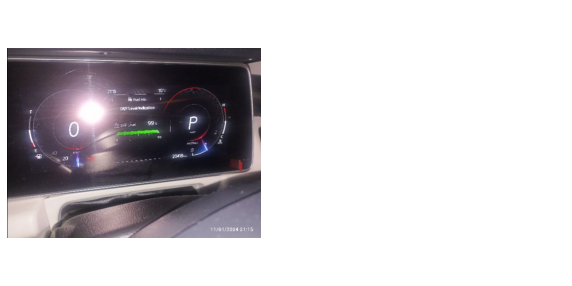

['2115', 'HHlu', 'DTLerUeWSaton', ': DEF_Gsel', 'P', '111011202421.15', '30I']
2115 --- 2115 kms
odo 2\drop_car_odometer-1D1A4E15.jpg


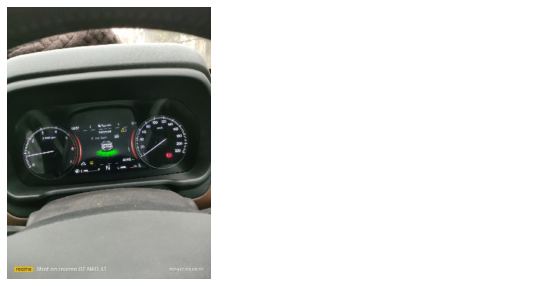

['麾R mi', '(7', 'Eosrre', 'o0', 'TegIIe', 'Shot ohrealme CTNED ST', '20240NAN05']
20240 --- 20240 kms
odo 2\drop_car_odometer-1DFE19B2.jpg


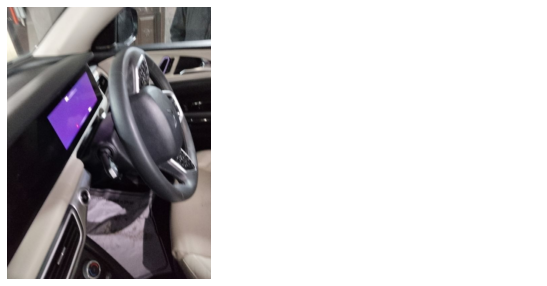

[]
 ---  kms
odo 2\drop_car_odometer-1E19B51A.jpg


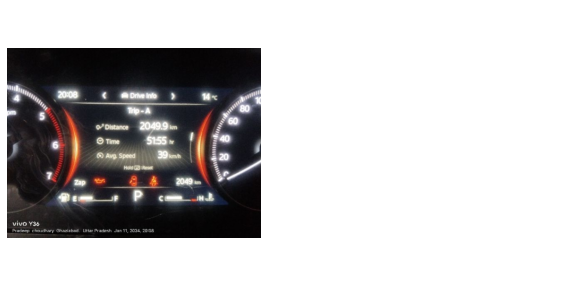

['2008', 'Oriwe Ino', '80', '60', '0DIsance', '20499', '0 Tlme', '5155', '40', '0Avg Speed', '39', 'Th', '20', 'NadCJ:Rw', 'Ta0', '2049', 'Vivo Y36', 'Pradeep', 'CTOUIITHR;', 'Ghazlabad', 'Pradesh Jan 11,2024.20:08', 'Uitn']
2049 --- 2049 kms
odo 2\drop_car_odometer-1E78CA74.jpg


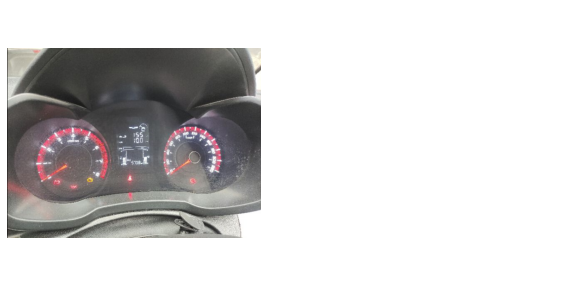

['!', '5d']
 ---  kms
odo 2\drop_car_odometer-1EAEA39E.jpg


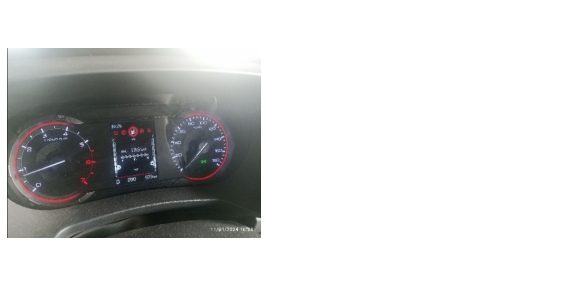

['U ', 'oOrra', 'S49', '10Swn', 'T0', '3', 'CC0', '1101120241028', '00', 'Ogw']
 ---  kms
odo 2\drop_car_odometer-1ED7611B.jpg


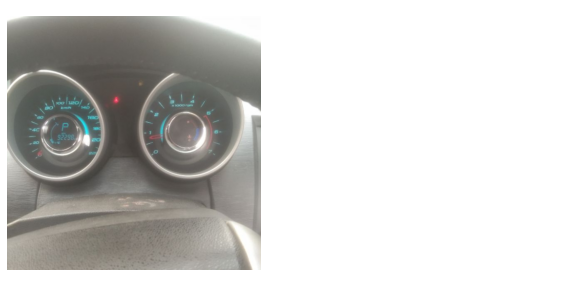

['0', ' laol', 'ao', 'wg', '16', 'C', '92298']
92298 --- 92298 kms
odo 2\drop_car_odometer-1F29F2F2.jpg


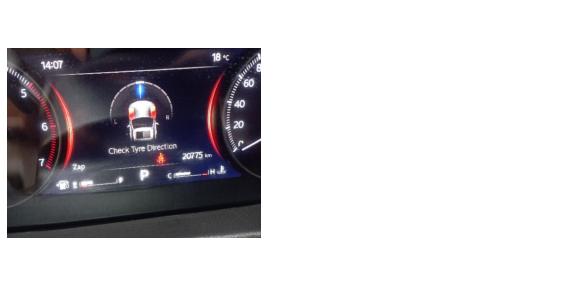

['18e', '14:07', '60', '5', '40', '20', 'Check Tyre Direction', '20775', 'Zap', 'I']
20775 --- 20775 kms
odo 2\drop_car_odometer-20530F39.jpg


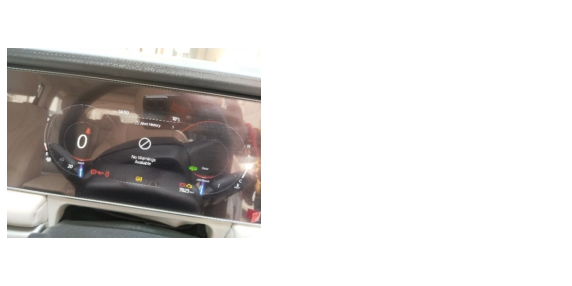

['0', 'Aallaole', '75', 'Nt [e', 'WaO', 'We 8']
 ---  kms
odo 2\drop_car_odometer-20BEF67F.jpg


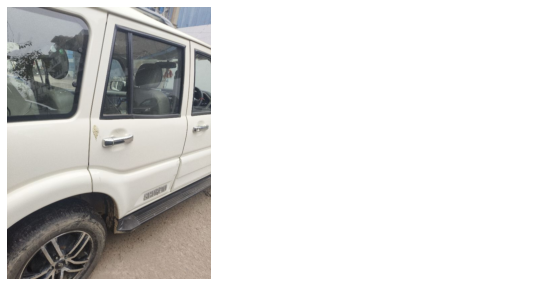

['AWW']
 ---  kms
odo 2\drop_car_odometer-21243C49.jpg


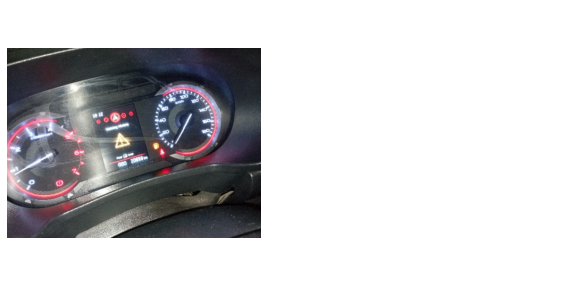

['3']
 ---  kms
odo 2\drop_car_odometer-218396BE.jpg


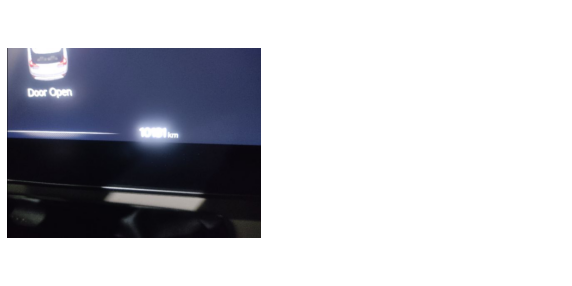

['DOsn', 'b', 'M']
 ---  kms
odo 2\drop_car_odometer-21879426.jpg


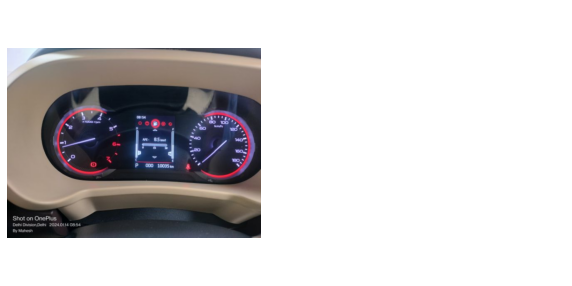

['00', '85o', '10', '10', 'OOO', '100]5w', 'Shot on OnePlus', 'Dahl O Mso Olh  20240114 085', "By 'ahush", 'uunmea Cte']
100]5w --- 100]5w kms
odo 2\drop_car_odometer-227EA83D.jpg


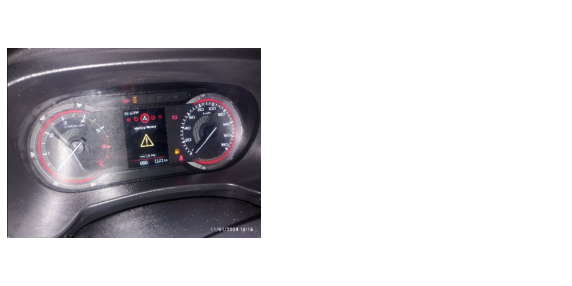

['1OO', 'q IP', 'I', 'Jennn KWn', '1121', 'Q', '711011202418.78']
1121 --- 1121 kms
odo 2\drop_car_odometer-22A03213.jpg


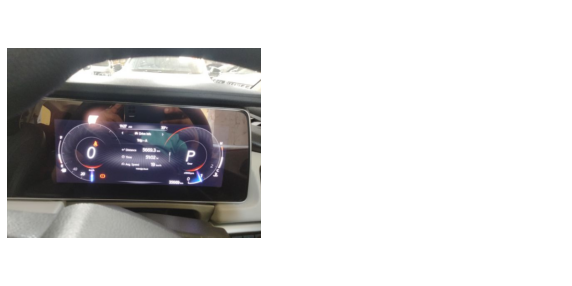

['5', 'S', 'P']
 ---  kms
odo 2\drop_car_odometer-22D35483.jpg


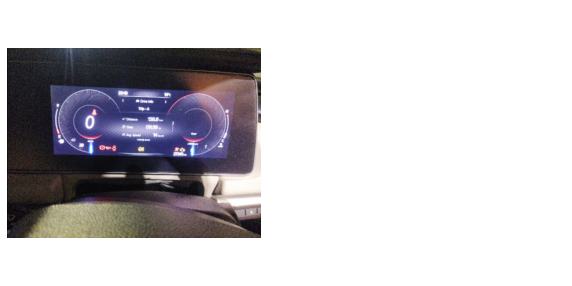

[' Cmoado', 'Dn', '0', '094', '6』', 'Qm']
 ---  kms
odo 2\drop_car_odometer-2361A929.jpg


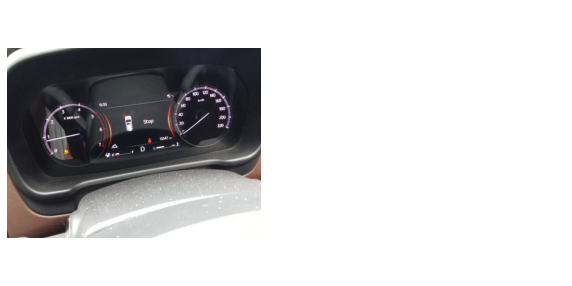

['TIIUTNf', '70I', 'StP', 'TP4T1 ']
 ---  kms
odo 2\drop_car_odometer-24350404.jpg


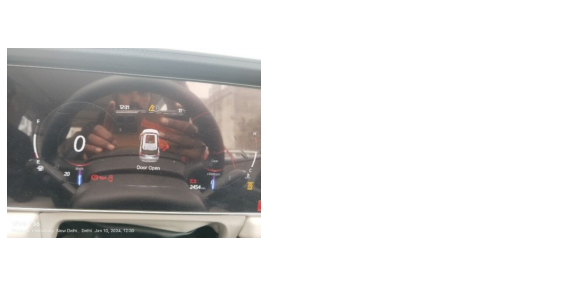

['DHI', 'Doo Open', '@8', '2454', 'Delhi', 'Dalhi Jan 10,7024。12.30']
2454 --- 2454 kms
odo 2\drop_car_odometer-24C36F4F.jpg


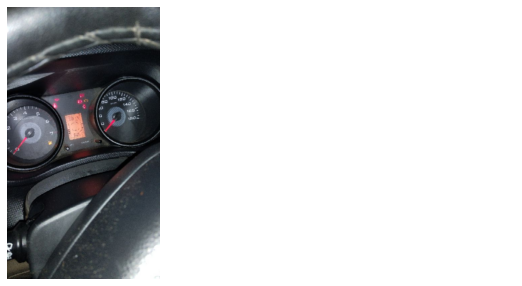

['40', '160', '100', '100', '130']
 ---  kms
odo 2\drop_car_odometer-257375A8.jpg


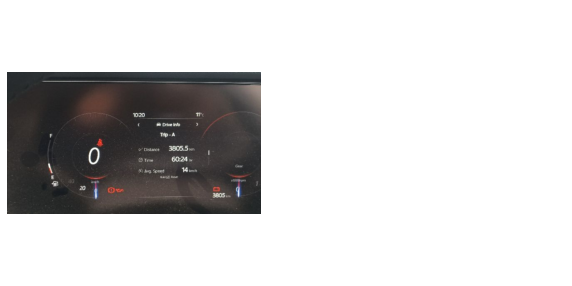

['1020', 'DreInlo', '', 'Oltao', '38055w', '台 Time', '6024', '4w Speed', '14lnn', 'INC Nso', 'O', '3805']
3805 --- 3805 kms
odo 2\drop_car_odometer-257B008C.jpg


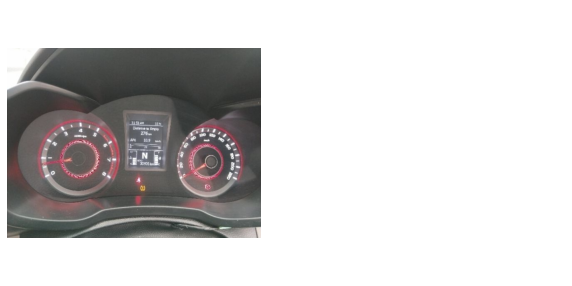

KeyboardInterrupt: 

In [16]:
# Create a figure with two subplots

for i in os.listdir(dir):
    img = os.path.join(dir,i)
    image = cv2.imread(img)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].axis('off')  # Hide the axis

# Display the second image
    # axes[1].imshow(cv2.cvtColor(cropped_ocr, cv2.COLOR_BGR2RGB))
    axes[1].axis('off')  # Hide the axis

# Show the plot
    plt.show()

    full_ocr = reader.readtext(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), detail=0)
# cropped_ocr = reader.readtext(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB), detail=0)
    print(full_ocr)

    kms_str = get_kms(full_ocr)
    corr_kms_str = correct_kms_str(kms_str) + ' kms'
    print(kms_str, "---", corr_kms_str)
    print(img)
